In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from scipy.stats import probplot
from statistics import mean, stdev
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc, confusion_matrix, f1_score, classification_report, mean_absolute_error, log_loss
from sklearn.model_selection import KFold, cross_val_score, cross_validate, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.svm import SVC 
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [38]:
import pandas as pd

file_path = 'D:\WorkSpace_Thinh1\FSS\hmeq.csv'
data = pd.read_csv(file_path)

data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [39]:
data_train,data_test = train_test_split(data,test_size=0.2,random_state=0)

In [40]:
data_test1 = data_test.copy()

In [41]:
numeric_columns = data_test.select_dtypes(include=['number']).columns

for col in numeric_columns:
    median_value = data_test[col].median()
    data_test[col].fillna(median_value, inplace=True)

missing_values_after_imputation = data_test[numeric_columns].isnull().sum()
missing_values_after_imputation

C:\Users\pc\AppData\Local\Temp\ipykernel_30908\3973881275.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test[col].fillna(median_value, inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_30908\3973881275.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [42]:
data_test["REASON"] = data_test["REASON"].fillna("Other reason")
data_test['JOB'] = data_test['JOB'].fillna(data_test['JOB'].mode()[0])

In [43]:
categorical_columns = data_test.select_dtypes(include=['object']).columns

missing_values_after_imputation_categorical = data_test[categorical_columns].isnull().sum()
missing_values_after_imputation_categorical

REASON    0
JOB       0
dtype: int64

In [44]:
data_test = pd.get_dummies(data_test, columns=['JOB', 'REASON'])
data_test.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,REASON_DebtCon,REASON_HomeImp,REASON_Other reason
916,1,9000,84532.0,104000.0,3.0,0.0,0.0,50.666667,1.0,3.0,34.319763,False,False,False,True,False,False,True,False,False
3338,0,17700,72911.0,97317.0,1.0,0.0,0.0,82.398384,0.0,17.0,25.329251,True,False,False,False,False,False,True,False,False
5754,0,43700,66859.0,48535.0,8.0,6.0,0.0,95.719805,1.0,19.0,26.981183,False,False,True,False,False,False,True,False,False
4290,0,22400,98238.0,135561.0,8.0,0.0,0.0,194.282099,0.0,20.0,29.373607,False,False,False,True,False,False,True,False,False
1540,0,11300,46120.0,52911.0,19.0,0.0,0.0,229.441578,1.0,17.0,36.334814,True,False,False,False,False,False,False,True,False


In [45]:
y = data_test["BAD"]                  
X = data_test.drop(["BAD"],axis=1)  

In [46]:
import numpy as np

def scale_score(p):
    factor = 25/np.log(2)
    offset = 600 - factor*np.log(50)
    val = (1-p)/p
    score = offset + factor * np.log(val)
    score = score + 150
    return round(max(0, min(score, 850)))

In [47]:
import numpy as np

def scale_score_normalized(p, p_min=0.01, p_max=0.99):
    factor = 25 / np.log(2)
    offset = 750 - factor * np.log(50)
    
    val =  p / (1-p)
    score = offset + factor * np.log(val)
    
    val_min = (1 - p_min) / p_min
    val_max = (1 - p_max) / p_max
    
    score_min = offset + factor * np.log(val_min)
    score_max = offset + factor * np.log(val_max)
    
    normalized_score = 750 * (score - score_min) / (score_max - score_min)
    
    return round(max(0, min(normalized_score, 750)))



In [48]:
import joblib

rf_model = joblib.load(r'D:\WorkSpace_Thinh1\FSS\model\best_rf_model.pkl')

In [49]:
pred_prob_test = rf_model.predict_proba(X)[:,1]
data_test["Prob"] = pred_prob_test
data_test["Score"] = data_test["Prob"].apply(lambda x: scale_score(x))
data_test["BAD"] = y

In [50]:
data_test["Score"].max()

850

In [51]:
data_test["Score"].min()

498

In [52]:
data_test.head(20)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,REASON_DebtCon,REASON_HomeImp,REASON_Other reason,Prob,Score
916,1,9000,84532.0,104000.0,3.0,0.0,0.0,50.666667,1.0,3.0,...,False,False,True,False,False,True,False,False,0.718043,575
3338,0,17700,72911.0,97317.0,1.0,0.0,0.0,82.398384,0.0,17.0,...,False,False,False,False,False,True,False,False,0.011642,769
5754,0,43700,66859.0,48535.0,8.0,6.0,0.0,95.719805,1.0,19.0,...,False,True,False,False,False,True,False,False,0.010306,774
4290,0,22400,98238.0,135561.0,8.0,0.0,0.0,194.282099,0.0,20.0,...,False,False,True,False,False,True,False,False,0.004191,806
1540,0,11300,46120.0,52911.0,19.0,0.0,0.0,229.441578,1.0,17.0,...,False,False,False,False,False,False,True,False,0.014858,760
4441,0,23100,71680.0,101492.0,1.0,0.0,0.0,230.361616,5.0,24.0,...,False,False,False,False,False,True,False,False,0.018021,753
1922,0,12600,49986.0,67896.0,3.0,0.0,0.0,190.159907,1.0,17.0,...,False,False,False,False,False,True,False,False,0.005256,798
5672,0,40400,63131.0,109395.0,14.0,0.0,0.0,198.448419,0.0,21.0,...,False,False,False,False,False,True,False,False,0.004170,806
5195,1,28000,86600.0,127000.0,6.5,0.0,4.0,234.366667,5.0,35.0,...,False,False,True,False,False,True,False,False,0.721758,575
1281,0,10300,57676.0,71027.0,19.0,0.0,0.0,157.519637,1.0,11.0,...,False,True,False,False,False,True,False,False,0.024393,742


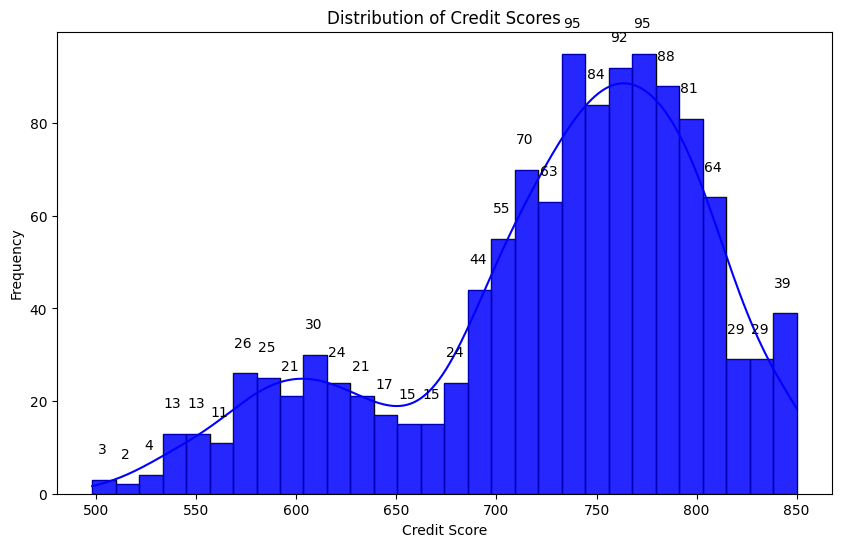

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(data_test["Score"], bins=30, kde=True, color='blue')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

bin_counts, bin_edges, _ = plt.hist(data_test["Score"], bins=30, color='blue', alpha=0.7)

for count, edge in zip(bin_counts, bin_edges[:-1]):
    plt.text(edge + 5, count + 5, f'{int(count)}', fontsize=10, ha='center', va='bottom')

plt.show()

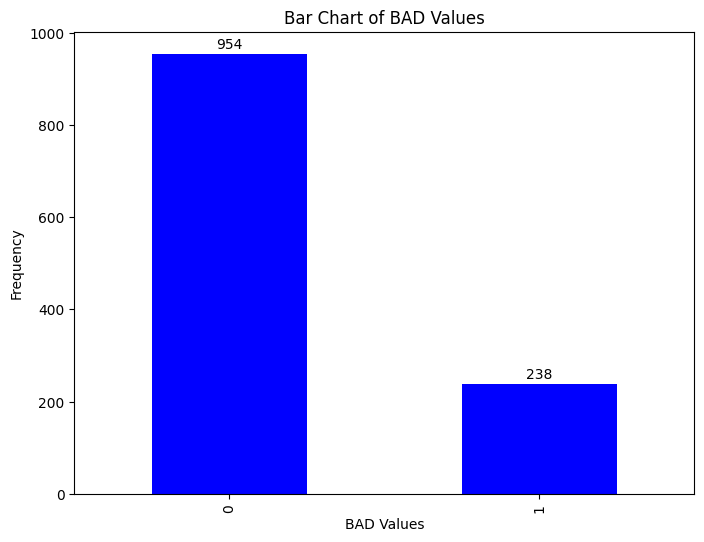

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

bad_value_counts = data_test['BAD'].value_counts()

plt.figure(figsize=(8, 6))
ax = bad_value_counts.plot(kind='bar', color='blue')

plt.xlabel('BAD Values')
plt.ylabel('Frequency')
plt.title('Bar Chart of BAD Values')

for index, value in enumerate(bad_value_counts):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


In [55]:
# Thêm các cột Prob và Score vào tập data gốc dựa trên chỉ số
data_test1["Prob"] = data_test["Prob"]
data_test1["Score"] = data_test["Score"]

# Lưu tập data mới vào file CSV
output_file_path = 'D:\\WorkSpace_Thinh1\\FSS\\hmeq_with_scores.csv'
data_test1.to_csv(output_file_path, index=False)
